In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### EXAMPLE USE OF `read_fwf()`

* you are free to duplicate this!

In [2]:
df = pd.read_fwf("asnef_900k_records.fin.dat", header=None,
            widths=[8,24,2,3,
                    4,6,4,1,
                    3,2,1,1,
                    3,1,2,2,
                    1,1,3,1,
                    2,3,1,1],
            names=['serial_number','name','res_state','res_county',
                   
                   'enlistment_place','enlistment_date','grade_alpha','grade_code',
                   
                   'branch_alpha','branch_code','empty_0','term',
                   
                   'longevity','source','nativity','birth_year',
                   
                   'race','education','occupation','marital_status',
                   
                   'height','weight','component','card_number'
                  ],
            dtype=str)

### SOME DATA CLEANING

In [3]:
# CLEAN UP HEIGHT
# df.height = \
df['height'] = \
    pd.to_numeric(df.height, errors="coerce") \
        .dropna() \
        .astype(int) 

In [4]:
df['height'] = df.query('height>48 and height<86')['height']

<AxesSubplot:>

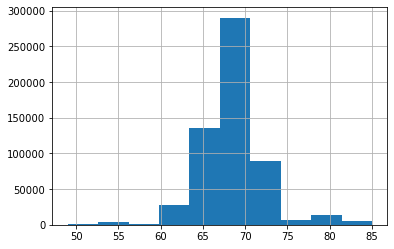

In [5]:
df["height"].hist()

<AxesSubplot:>

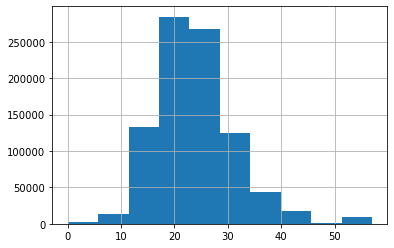

In [6]:
# CLEAN UP BIRTH YEAR
df.birth_year = \
    pd.to_numeric(df.birth_year, errors="coerce") \
        .dropna() \
        .astype(int) 

# ADD AGE COLUMN FOR EASIER CALCULATION
df['age'] = abs(42 - df.birth_year)
df["age"].hist()

### GET THE DATA IN A PLOT

* we are plotting the **median** height for 30-39 year olds 
* and we are plotting the standard deviation of the same date

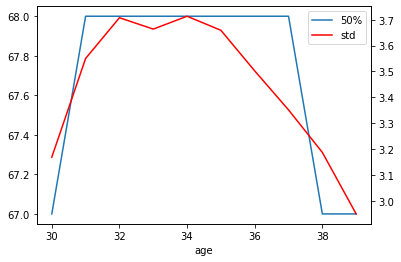

In [7]:
ax = df.query('age>29 and age<40') \
       .groupby('age') \
       .describe()['height'][['50%']] \
       .plot()

# set up the right axis
ax_right = ax.twinx()
ax_right.spines['right'].set_position(('axes', 1.0))

# you can decide the more efficient way to pull the data without the duplication
df.query('age>29 and age<40') \
   .groupby('age') \
   .describe()['height'][['std']] \
   .plot(ax=ax_right, color='red', legend=None)

# Proper legend position
line1, label1 = ax.get_legend_handles_labels()
line2, label2 = ax_right.get_legend_handles_labels()

# display the legend and plot again
ax.legend(line1+line2, label1+label2, loc=0)